In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
warnings.filterwarnings('ignore')

from extract import Extract

# **CARGA DE DATA**

In [2]:
df_global = pd.read_csv(
    'all_peru21.csv', parse_dates=['Fecha']
)
df_global.index = df_global['Fecha']
df_global['weekday'] = df_global['Fecha'].dt.weekday
df_global = df_global.sort_index()

del df_global.index.name
df_global.head()

,Producto,Fecha,CodigoSapAgencia,NombreAgencia,CodigoSapCanilla,NombreCanilla,Pauta,Devolucion,VentaNeta,Lim. Inf Vta. Proy,Vta. Proy,Lim. Sup Vta. Proy,weekday
2018-01-01,Peru 21,2018-01-01,1200000065,CALLAO,1300000005,ABANTO LECCA LIDIA,2,2,0,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300005097,PALOMINO RAMIREZ DIANA,0,0,0,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004633,MORENO ALVA MARIA ANASTACIA,10,1,9,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004632,MORENO ALVA JULIO,10,2,8,NaN,NaN,NaN,0
2018-01-01,Peru 21,2018-01-01,1200000077,LOS OLIVOS,1300004628,MORALES VILLALOBOS LOURDES V.,0,0,0,NaN,NaN,NaN,0


In [3]:
# df_global.to_csv('all_peru21.csv', index=False)

In [4]:
df_global.columns

Index(['Producto', 'Fecha', 'CodigoSapAgencia', 'NombreAgencia',
       'CodigoSapCanilla', 'NombreCanilla', 'Pauta', 'Devolucion', 'VentaNeta',
       'Lim. Inf Vta. Proy', 'Vta. Proy', 'Lim. Sup Vta. Proy', 'weekday'],
      dtype='object')

#### **OBSERVACION, por casos de datos faltantes**

In [5]:
col_proy = 'Vta. Proy'
col_venta = 'VentaNeta'
col_pauta = 'Pauta'

In [6]:
df_global[df_global['CodigoSapCanilla'] == 1300000384][[col_pauta, col_venta, col_proy]].tail(15)

,Pauta,VentaNeta,Vta. Proy
2019-01-20,2,1,NaN
2019-01-21,1,0,0.000000
2019-01-22,1,0,0.000000
2019-01-23,1,0,0.000000
2019-01-24,0,0,0.000000
2019-01-25,0,0,0.000000
2019-01-26,0,0,0.000000
2019-01-27,2,1,1.053747
2019-01-28,0,0,0.000000
2019-01-29,0,0,0.000000


In [7]:
for cc in [1300002282,1300002397,1300002898,1300005286,
           1300005692,1300005969,1300011566,1300011920,
           1300012212,1300012650,1300012838,1300013177,
           1300013254,1300013469,1300013484,1300013547]:
    display(df_global[df_global['CodigoSapCanilla'] == cc][
        [col_pauta, col_venta, col_proy]].tail(15))


,Pauta,VentaNeta,Vta. Proy
2018-11-24,15,12,NaN
2018-11-25,3,3,NaN
2018-11-26,20,17,NaN
2018-11-27,20,14,NaN
2018-11-28,19,12,NaN
2018-11-29,15,14,NaN
2018-11-30,16,14,NaN
2018-12-01,11,10,NaN
2018-12-02,5,5,NaN
2018-12-03,17,17,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-18,7,6,NaN
2018-01-19,10,6,NaN
2018-01-20,0,0,NaN
2018-01-21,5,3,NaN
2018-01-22,10,6,NaN
2018-01-23,6,2,NaN
2018-01-24,10,7,NaN
2018-01-25,8,7,NaN
2018-01-26,11,9,NaN
2018-01-27,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-02-19,0,0,NaN
2018-02-20,0,0,NaN
2018-02-21,0,0,NaN
2018-02-22,0,0,NaN
2018-02-23,0,0,NaN
2018-02-24,0,0,NaN
2018-02-25,0,0,NaN
2018-02-26,0,0,NaN
2018-02-27,0,0,NaN
2018-02-28,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-08-13,0,0,NaN
2018-08-14,0,0,NaN
2018-08-15,0,0,NaN
2018-08-16,0,0,NaN
2018-08-17,0,0,NaN
2018-08-18,0,0,NaN
2018-08-19,0,0,NaN
2018-08-20,0,0,NaN
2018-08-21,0,0,NaN
2018-08-22,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-09,0,0,NaN
2018-01-10,0,0,NaN
2018-01-11,0,0,NaN
2018-01-12,0,0,NaN
2018-01-13,0,0,NaN
2018-01-14,0,0,NaN
2018-01-15,0,0,NaN
2018-01-16,0,0,NaN
2018-01-17,0,0,NaN
2018-01-18,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-08-13,0,0,NaN
2018-08-14,0,0,NaN
2018-08-15,0,0,NaN
2018-08-16,0,0,NaN
2018-08-17,0,0,NaN
2018-08-18,0,0,NaN
2018-08-19,0,0,NaN
2018-08-20,0,0,NaN
2018-08-21,0,0,NaN
2018-08-22,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-16,4,2,NaN
2018-06-17,2,2,NaN
2018-06-18,4,1,NaN
2018-06-19,1,0,NaN
2018-06-20,4,3,NaN
2018-06-21,0,0,NaN
2018-06-22,5,1,NaN
2018-06-23,4,3,NaN
2018-06-24,3,3,NaN
2018-06-25,3,1,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-16,1,0,NaN
2018-06-17,2,1,NaN
2018-06-18,1,0,NaN
2018-06-19,1,0,NaN
2018-06-20,1,0,NaN
2018-06-21,0,0,NaN
2018-06-22,2,0,NaN
2018-06-23,1,0,NaN
2018-06-24,2,1,NaN
2018-06-25,1,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-07-12,0,0,NaN
2018-07-13,0,0,NaN
2018-07-14,0,0,NaN
2018-07-15,0,0,NaN
2018-07-16,0,0,NaN
2018-07-17,0,0,NaN
2018-07-18,0,0,NaN
2018-07-19,0,0,NaN
2018-07-20,0,0,NaN
2018-07-21,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-03,0,0,NaN
2018-01-04,0,0,NaN
2018-01-05,0,0,NaN
2018-01-06,0,0,NaN
2018-01-07,0,0,NaN
2018-01-08,0,0,NaN
2018-01-09,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-05,0,0,NaN
2018-01-08,0,0,NaN
2018-01-09,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-07-12,0,0,NaN
2018-07-13,0,0,NaN
2018-07-14,0,0,NaN
2018-07-15,0,0,NaN
2018-07-16,0,0,NaN
2018-07-17,0,0,NaN
2018-07-18,0,0,NaN
2018-07-19,0,0,NaN
2018-07-20,0,0,NaN
2018-07-21,0,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-01-15,3,0,NaN
2018-01-16,2,0,NaN
2018-01-17,2,1,NaN
2018-01-18,1,0,NaN
2018-01-19,2,0,NaN
2018-01-20,2,1,NaN
2018-01-21,2,0,NaN
2018-01-22,2,0,NaN
2018-01-23,2,0,NaN
2018-01-24,2,0,NaN


,Pauta,VentaNeta,Vta. Proy
2018-06-19,0,0,NaN
2018-06-20,1,0,NaN
2018-06-21,0,0,NaN
2018-06-22,1,0,NaN
2018-06-23,1,0,NaN
2018-06-24,3,0,NaN
2018-06-25,1,0,NaN
2018-06-26,0,0,NaN
2018-06-27,1,0,NaN
2018-06-28,0,0,NaN


### Filtrado Preventivo

In [8]:
df = df_global[(df_global['Pauta'] > 0) | (df_global['VentaNeta'].notnull())]

if df.shape == df_global.shape:
    del df_global

df.shape

(295479, 13)

## Validacion de nulos Globales

In [9]:
df.isnull().sum(), df.shape

(Producto                   0
 Fecha                      0
 CodigoSapAgencia           0
 NombreAgencia              0
 CodigoSapCanilla           0
 NombreCanilla              0
 Pauta                      0
 Devolucion                 0
 VentaNeta                  0
 Lim. Inf Vta. Proy    285015
 Vta. Proy             285015
 Lim. Sup Vta. Proy    285015
 weekday                    0
 dtype: int64, (295479, 13))

## Configuracion

Se procede a realizar dos intervalos de validación

In [10]:
until_train_1 = '2019-01-20'
since_date_1 = '2019-01-21'
until_date_1 = '2019-01-27'

In [11]:
df.tail()

,Producto,Fecha,CodigoSapAgencia,NombreAgencia,CodigoSapCanilla,NombreCanilla,Pauta,Devolucion,VentaNeta,Lim. Inf Vta. Proy,Vta. Proy,Lim. Sup Vta. Proy,weekday
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012513,SALAZAR CORONEL VIRGILIO,2,0,2,0.000000,0.000000,0.000000,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012514,SALZAR VILCHEZ OSCAR VIRGILIO,1,0,1,0.694915,0.998889,1.302862,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012515,ROJAS BILBAO EMILIA,1,1,0,0.000000,0.000000,0.000000,6
2019-02-03,Peru 21,2019-02-03,1200001015,CANTO GRANDE,1300012232,OTERO SANCHEZ OMAR CESAR,1,1,0,0.316834,0.544568,0.772302,6
2019-02-03,Peru 21,2019-02-03,1200000043,MIRAFLORES 1,1300014543,ARANDA SOLANO EMPERADOR,3,0,3,1.534909,1.959923,2.384938,6


In [12]:
agencias_detectadas = df.groupby(by=['NombreAgencia'])['CodigoSapAgencia'].max()
agencias_detectadas

NombreAgencia
CALLAO          1200000065
CANTO GRANDE    1200001015
JESUS MARIA     1200000047
LINCE           1200000026
LOS OLIVOS      1200000077
MIRAFLORES 1    1200000044
Name: CodigoSapAgencia, dtype: int64

## Creación de contenedor de canillas por agencia

In [13]:
class MYExtract(Extract):
    
    def __init__(self, data, since='2019-01-21', until='2019-01-27', until_train='2019-01-20'):
        self.since = since
        self.until = until
        self.until_train = until_train
        self.data = data[:until]
        
        self.last_date_canilla = self.data[:until].groupby(
            by=['CodigoSapCanilla']
        )[['Fecha', col_proy, col_venta]].max()
        
        print("Detección de valores nulos en pronosticos o ventas netas")
        display(
            self.last_date_canilla[
                (self.last_date_canilla[col_proy].isnull()) | (self.last_date_canilla[col_venta].isnull())
            ]
        )
        print("Total canillas: ", self.last_date_canilla.shape[0])
        
        self.unique_canillas = {
            code for code in data['CodigoSapCanilla'].unique() \
            if self.validate_proy(code)
        }
        print("Canillas a analizar: ", len(self.unique_canillas))
        
        # Creamos una columa que indique el dia de semana  
        self.data['weekday'] = self.data['Fecha'].dt.weekday
        self.list_days = list(data['weekday'].unique())
        print("Columna de dias de semana creada")
    
    def validate_proy(self, code):
        return str(self.last_date_canilla[col_proy][code]).lower() != 'nan' and \
            str(self.last_date_canilla['VentaNeta'][code]).lower() != 'nan'
    
    def procces_day(self, data, num_day):
        df3 = data[data['weekday'] == num_day].copy()
        col, new_col = 'VentaNeta', 'new'
        
        """
        METODO DE AUTOCOMPLETADO INTERPOLATE ROLLING
        """
        if df3[col][-4:].mean() == df3[col][-1] and df3[col][-4:].mean() == df3[col][-2] and df3[col][-4:].mean() < 2:
            print("Se detecto una relacion lineal : ", df3[col][-5:], 'num_day ', num_day)
            return df3[col]
        
        mean = df3[col].median()
        
        df3[col] = df3[['Pauta', col]].apply(
            lambda _: _[col] if _['Pauta'] > 0 else np.nan, axis=1
        )
        
        df3[col].fillna(mean, inplace=True)
        """
        # Logica si la ausencia supera el 65% en un día especifico, lo
        # dejo tal cual ya que se considera tendencia a faltar
        
        if df3[df3['Pauta'] == 0].shape[0] / df3.shape[0] < 65:
            df3['VentaNeta'] = df3[['Pauta', 'VentaNeta']].apply(
                lambda _: _['VentaNeta'] if _['Pauta'] > 0 else np.nan, 
                axis=1
            )
            
            df3[new_col] = df3[col].copy()
            df3[new_col].interpolate(method='time', inplace=True)
            df3[new_col].fillna(df3[new_col].mean(), inplace=True)
            
            df3[new_col] = df3[new_col].rolling(3).mean()

            df3[col].fillna(
                 df3[new_col],
                inplace=True
            )
            # Reemplazamos los nulos con el promedio de los 3 ultimos mismos dias de semana
            if df3[col].isnull().sum() > 0:
                df3[col].fillna(df3[col].mean(), inplace=True)

        
        METODO AUTOCOMPLETADO MEDIA WEEKDAY

        if df3[col][-3:].mean() == df3[col][-1]:
            return df3[col]
        
        df3['mean'] = df3['Fecha'].apply(lambda _: df3['VentaNeta'][:_].mean())
        
        df3['VentaNeta'] = df3[['Pauta', 'VentaNeta']].apply(
                lambda _: _['VentaNeta'] if _['Pauta'] > 0 else np.nan, 
                axis=1
        )
        df3['VentaNeta'].fillna(
            df3['mean'], inplace=True
        )
        """
        return df3[col]
        
    def get_data_pauta_weekday(self, code):
        
        # Obtenemos las columnas de VEntaNeta y Pauta asociadas al canilla hasta 20/01/2019
        data_canilla = self.data[
            self.data['CodigoSapCanilla'] == code
        ][['VentaNeta', 'Pauta', 'Fecha', 'weekday']][:self.until_train].copy()
        
        # Deteccion de casos con demasiadas ausencias
        if data_canilla[data_canilla['Pauta'] == 0].shape[0] / data_canilla.shape[0] > 0.5:
            return 'Cantidad de ausencia supera el 50% de casos reportados'
                
        dicc_days = {}
        for num_day in self.list_days:
            dicc_days[num_day] = self.procces_day(data_canilla, num_day)
        
        return dicc_days
    
    def populate_data(self, code_agencia):
        lista_canillas = set(
            self.data[self.data['CodigoSapAgencia'] == code_agencia]['CodigoSapCanilla'].unique()
        )
        print('Total canillas en agencia: ', len(lista_canillas))
        
        lista_canillas = lista_canillas.intersection(self.unique_canillas)
        print('Canillas en agencia con ultimos datos no nulos: ', len(lista_canillas))
        
        dicc = {}
        for canilla in lista_canillas:
            response = self.get_data_pauta_weekday(canilla)
            
            if isinstance(response, str):
                print("\n DETECCION DE CASO INVALIDO ", canilla)
                print(response)
                fig, axes = plt.subplots(nrows=1, ncols=1)
                self.data[self.data['CodigoSapCanilla'] == canilla]['VentaNeta'].plot(
                    legend=True, ax=axes, title=canilla)
                print('/'*30)
            else:
                dicc[canilla] = response
        """
        for k, v in dicc.items():
            fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(13,15))
            for num_day, datus in v.items():
                datus.plot(
                    legend=True, ax=axes[num_day], title='{} - {}'.format(k, num_day)
                )
                self.data[
                    (self.data['CodigoSapCanilla'] == k) & (self.data['weekday'] == num_day)
                ]['VentaNeta'].plot(
                    legend=True, ax=axes[num_day]
                )
        """
        return dicc
    
    @staticmethod
    def valid_null(dicc_data):
        cant_nulos = 0
        
        for k, v in dicc_data.items():
            for num_day, datus in v.items():
                nulos = datus.isnull().sum()
                if nulos:
                    print(k, ' __ ', num_day ,' : ', nulos, 'de', v.get('data').shape[0])
                    cant_nulos +=1
        
        print('\n {} nulos detectados'.format(cant_nulos))

In [14]:
%%time
extractor_21_27 = MYExtract(df, since=since_date_1, until=until_date_1)

Detección de valores nulos en pronosticos o ventas netas


,Fecha,Vta. Proy,VentaNeta
CodigoSapCanilla,,,
1300002282,2018-12-09,NaN,20
1300002397,2018-02-03,NaN,14
1300002898,2018-01-23,NaN,0
1300005286,2018-03-05,NaN,4
1300005692,2018-01-23,NaN,0
1300005969,2018-08-27,NaN,6
1300011566,2018-01-23,NaN,15
1300011920,2018-08-27,NaN,24
1300012212,2018-07-01,NaN,4


Total canillas:  764
Canillas a analizar:  748
Columna de dias de semana creada
CPU times: user 85.5 ms, sys: 3.23 ms, total: 88.7 ms
Wall time: 88.4 ms


### JESUS MARIA

Total canillas en agencia:  157
Canillas en agencia con ultimos datos no nulos:  157
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-22    1
2018-12-29    1
2019-01-05    1
2019-01-12    1
2019-01-19    1
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-16    1
2018-12-23    1
2018-12-30    1
2019-01-06    1
2019-01-20    1
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto una relacion lineal :  2018-12-16    0
2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6

 DETECCION DE CASO INVALIDO  1300003350
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////

 DETECCION D

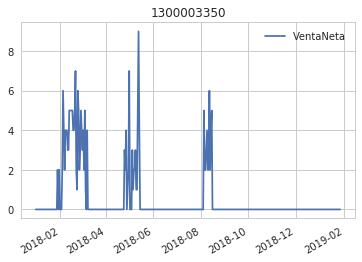

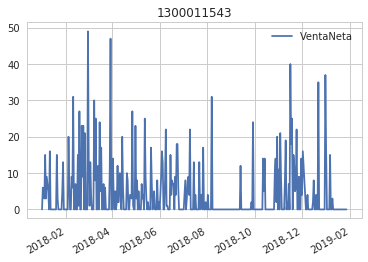

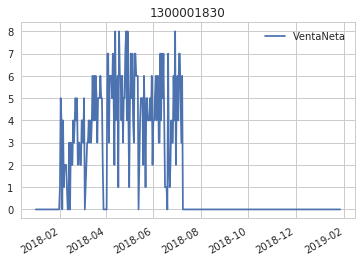

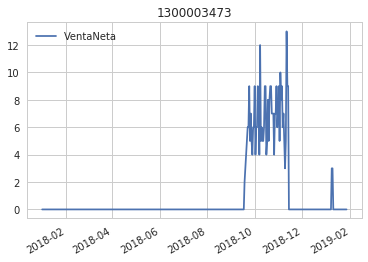

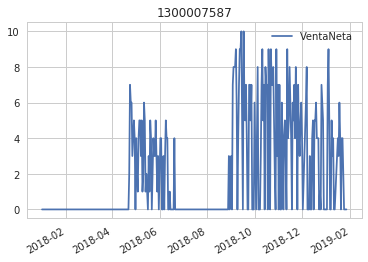

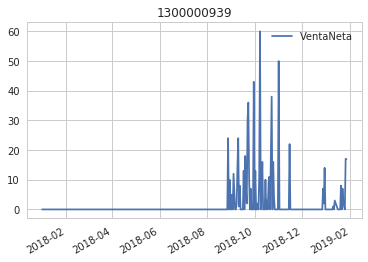

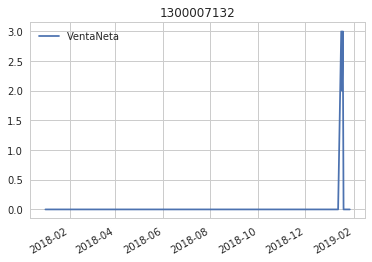

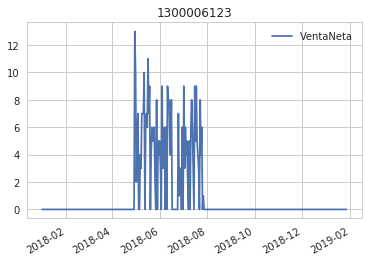

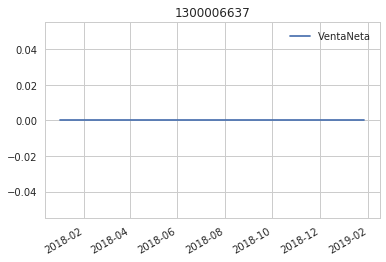

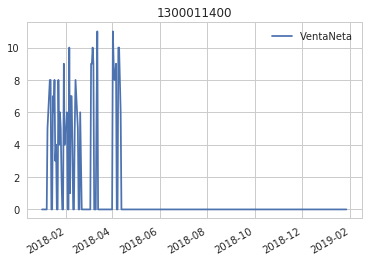

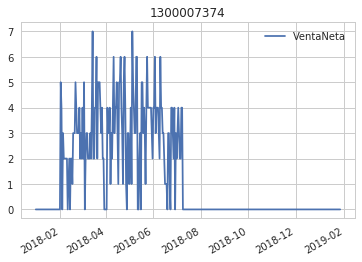

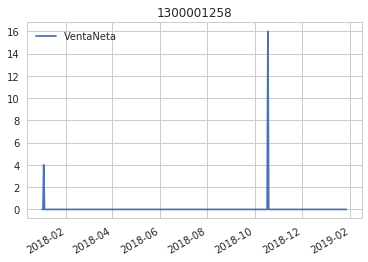

In [15]:
%%time
dicc_jesus_maria = extractor_21_27.populate_data(1200000047)

In [16]:
df[df['CodigoSapCanilla'] == 1300005890]['2019-01-10':'2019-01-20'][['VentaNeta', col_proy]]

,VentaNeta,Vta. Proy
2019-01-10,2,NaN
2019-01-11,2,NaN
2019-01-12,2,NaN
2019-01-16,1,NaN
2019-01-17,3,NaN
2019-01-18,2,NaN
2019-01-19,0,NaN
2019-01-20,0,NaN


Total canillas en agencia:  161
Canillas en agencia con ultimos datos no nulos:  159

 DETECCION DE CASO INVALIDO  1300006402
Cantidad de ausencia supera el 50% de casos reportados
//////////////////////////////
Se detecto una relacion lineal :  2018-12-17    0
2018-12-24    0
2018-12-31    0
2019-01-07    0
2019-01-14    0
Name: VentaNeta, dtype: int64 num_day  0
Se detecto una relacion lineal :  2018-12-19    1
2018-12-26    2
2019-01-02    0
2019-01-09    1
2019-01-16    1
Name: VentaNeta, dtype: int64 num_day  2
Se detecto una relacion lineal :  2018-12-21    0
2018-12-28    0
2019-01-04    0
2019-01-11    0
2019-01-18    0
Name: VentaNeta, dtype: int64 num_day  4
Se detecto una relacion lineal :  2018-12-22    0
2018-12-29    0
2019-01-05    0
2019-01-12    0
2019-01-19    0
Name: VentaNeta, dtype: int64 num_day  5
Se detecto una relacion lineal :  2018-12-23    0
2018-12-30    0
2019-01-06    0
2019-01-13    0
2019-01-20    0
Name: VentaNeta, dtype: int64 num_day  6
Se detecto un

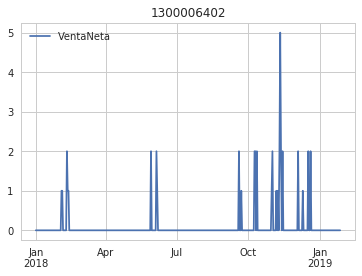

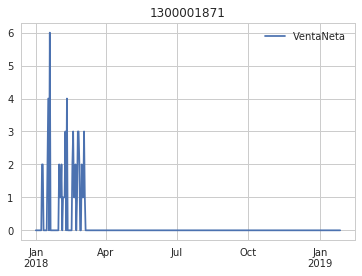

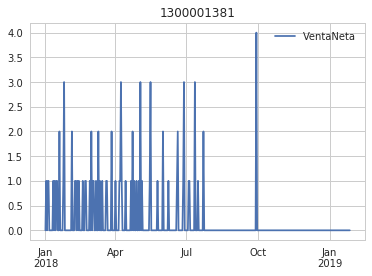

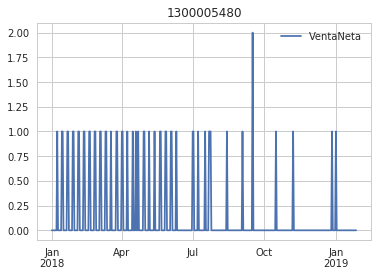

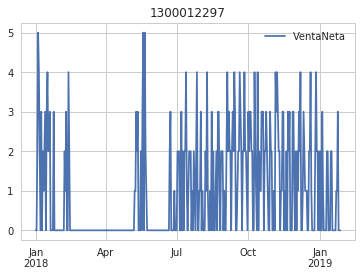

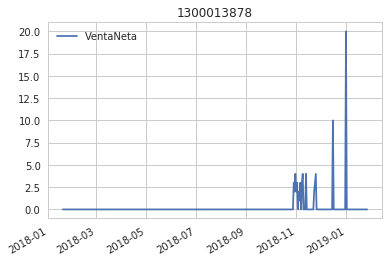

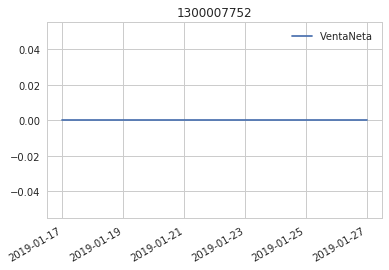

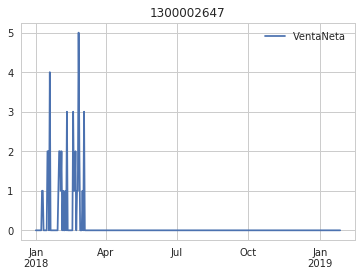

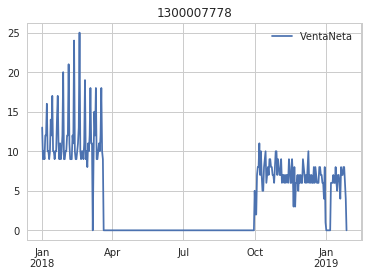

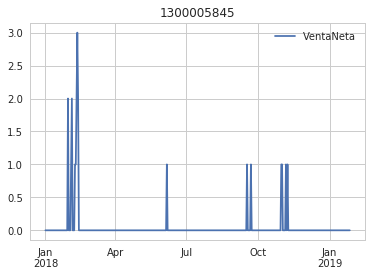

In [17]:
%%time
dicc_callao = extractor_21_27.populate_data(1200000065)

In [18]:
%%time
# dicc_canto_grande = extractor_21_27.populate_data(1200001015)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 4.77 µs


In [19]:
%%time
# dicc_lince = extractor_21_27.populate_data(1200000026)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 4.53 µs


In [20]:
%%time
# dicc_olivos = extractor_21_27.populate_data(1200000077)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 3.81 µs


In [21]:
%%time
# dicc_miraflores = extractor_21_27.populate_data(1200000044)

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 3.81 µs


In [22]:
nulos = 0
for k, v in dicc_jesus_maria.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)

0


In [23]:

nulos = 0
for k, v in dicc_callao.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)


0


In [24]:
"""
nulos = 0
for k, v in dicc_canto_grande.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)
"""

'\nnulos = 0\nfor k, v in dicc_canto_grande.items():\n    for num_day, datus in v.items():\n        nulos += datus.isnull().sum()\nprint(nulos)\n'

In [25]:
"""
nulos = 0
for k, v in dicc_olivos.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)
"""

'\nnulos = 0\nfor k, v in dicc_olivos.items():\n    for num_day, datus in v.items():\n        nulos += datus.isnull().sum()\nprint(nulos)\n'

In [26]:
"""
nulos = 0
for k, v in dicc_miraflores.items():
    for num_day, datus in v.items():
        nulos += datus.isnull().sum()
print(nulos)
"""

'\nnulos = 0\nfor k, v in dicc_miraflores.items():\n    for num_day, datus in v.items():\n        nulos += datus.isnull().sum()\nprint(nulos)\n'

In [27]:
def reemplace_percentile(val, val_smaller, val_bigger):     
    if val < val_smaller:
        return val_smaller
    elif val > val_bigger:
        return val_bigger
    return val

In [28]:
def noise_control(dicc_data, cut_down, cut_up):
    for k, v in dicc_data.items():
        for num_day, datus in v.items():
            #fig, axes = plt.subplots(nrows=1, ncols=1)
            #datus.plot(legend=True, ax=axes, title='{} - {}'.format(k, num_day))
            
            quantile_5 = int(datus.quantile(cut_down))
            quantile_95 = int(datus.quantile(cut_up))     
            
            if datus[-3:].mean() == datus[-1] and datus[-3:].mean() == datus[-2] and datus[-3:].mean() < 2:
                print("Relacion Lineal : ", k, num_day, datus[-5:].values, datus[-1])
            else:
                datus = datus.apply(lambda x: reemplace_percentile(x, quantile_5, quantile_95))
            #datus.plot(legend=True, ax=axes)
            
    return dicc_data

In [29]:
%%time
cut_up = 95/100
cut_down = 5/100

dicc_jesus_maria = noise_control(dicc_jesus_maria, cut_down, cut_up)

Relacion Lineal :  1300005890 0 [0. 1. 1. 1. 1.] 1.0
Relacion Lineal :  1300005890 6 [0 0 0 0 0] 0
Relacion Lineal :  1300007428 5 [1 1 1 1 1] 1
Relacion Lineal :  1300007428 6 [1 1 1 1 1] 1
Relacion Lineal :  1300005892 6 [0 0 0 0 0] 0
Relacion Lineal :  1300005897 6 [0 0 0 0 0] 0
Relacion Lineal :  1300000797 0 [13  0  0  0  0] 0
Relacion Lineal :  1300000797 1 [11  0  0  0  0] 0
Relacion Lineal :  1300000797 2 [0 0 0 0 0] 0
Relacion Lineal :  1300000797 3 [0 0 0 0 0] 0
Relacion Lineal :  1300000797 4 [0 0 0 0 0] 0
Relacion Lineal :  1300000797 5 [0 0 0 0 0] 0
Relacion Lineal :  1300000797 6 [0 0 0 0 0] 0
Relacion Lineal :  1300001345 6 [0 0 0 0 0] 0
Relacion Lineal :  1300001347 0 [0. 0. 1. 1. 1.] 1.0
Relacion Lineal :  1300001347 6 [0 0 0 0 0] 0
Relacion Lineal :  1300013643 6 [0 0 0 0 0] 0
Relacion Lineal :  1300011094 3 [0. 3. 1. 1. 1.] 1.0
Relacion Lineal :  1300003443 6 [0 0 0 0 0] 0
Relacion Lineal :  1300006547 6 [0 0 0 0 0] 0
Relacion Lineal :  1300003489 0 [2. 2. 1. 1. 1.] 

In [30]:
%%time
dicc_callao = noise_control(dicc_callao, cut_down, cut_up)

Relacion Lineal :  1300002338 0 [0 0 0 0 0] 0
Relacion Lineal :  1300002338 4 [0 0 0 0 0] 0
Relacion Lineal :  1300001827 0 [2. 5. 1. 1. 1.] 1.0
Relacion Lineal :  1300001827 2 [2 1 0 0 0] 0
Relacion Lineal :  1300003382 5 [0 0 0 0 0] 0
Relacion Lineal :  1300003382 6 [0 0 0 0 0] 0
Relacion Lineal :  1300005948 3 [0 0 0 0 0] 0
Relacion Lineal :  1300011592 6 [0 0 0 0 0] 0
Relacion Lineal :  1300011597 3 [0 0 0 0 0] 0
Relacion Lineal :  1300011599 0 [0 0 0 0 0] 0
Relacion Lineal :  1300011599 5 [0. 0. 1. 1. 1.] 1.0
Relacion Lineal :  1300011599 6 [0 0 0 0 0] 0
Relacion Lineal :  1300011601 0 [0 0 0 0 0] 0
Relacion Lineal :  1300011601 1 [0 0 0 0 0] 0
Relacion Lineal :  1300011601 2 [1 0 0 0 0] 0
Relacion Lineal :  1300011601 3 [0 0 0 0 0] 0
Relacion Lineal :  1300011601 6 [0 0 0 0 0] 0
Relacion Lineal :  1300006484 1 [1 0 0 0 0] 0
Relacion Lineal :  1300001883 3 [0 2 0 0 0] 0
Relacion Lineal :  1300001883 5 [2 1 0 0 0] 0
Relacion Lineal :  1300007006 2 [0 0 0 0 0] 0
Relacion Lineal :  1

In [31]:
%%time
# dicc_canto_grande = noise_control(dicc_canto_grande, cut_down, cut_up)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [32]:
%%time
# dicc_lince = noise_control(dicc_lince, cut_down, cut_up)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [33]:
%%time
# dicc_olivos = noise_control(dicc_olivos, cut_down, cut_up)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [34]:
%%time
# dicc_miraflores = noise_control(dicc_miraflores, cut_down, cut_up)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


In [35]:
from statsmodels.tsa.arima_model import ARIMA
from itertools import product

ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 4 # Semanal

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [36]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

def optimizeSARIMA(data, parameters_list, d, D, s):
    try:
        results = []
        best_aic = 1000000
        best_model = None

        for param in parameters_list:

            try:
                model=sm.tsa.statespace.SARIMAX(
                    data, 
                    order=(param[0], d, param[1]),
                    seasonal_order=(param[2], D, param[3], s)
                ).fit(disp=-1)
            except:
                continue
            else:
                aic = model.aic
                if aic < best_aic:
                    best_model = model
                    best_aic = aic
                    best_param = param
        
        print("Mejores parametros : ", best_param)
        return best_model
    except Exception as e:
        print("ERROR:::::: ", str(e))
        return None

In [37]:
%%time

def modeling(dicc_data):
    dicc_result = {}
    for k, v in dicc_data.items():
        dicc_result[k] = {}
        for num_day, datus in v.items():

            if datus[-3:].mean() == datus[-1] and datus[-3:].mean() == datus[-2] and datus[-3:].mean() < 2:
                print("Prediccion lineal :", k, num_day, datus[-3:].values, datus[-1])
                dicc_result[k][num_day] = datus[-1]
            else:
                try:
                    print("--------> ", k, num_day)
                    model = optimizeSARIMA(datus, parameters_list, d, D, s)
                    if not model:
                        raise Exception('Modelo Nulo retornado')
                        
                    lendata = datus.shape[0]
                    forecast = model.predict(start=lendata, end=lendata + 1)
                    print('Prediccion sarimax ', k, num_day, datus[-3:].values,forecast.values[0])
                    dicc_result[k][num_day] = forecast.values[0]
                except Exception as e:
                    print("ERROR : ", str(e))
                    print("====P media 4 last", k, num_day, datus[-5:].values, datus[-4:].mean())
                    dicc_result[k][num_day] = datus[-4:].mean() * datus.values[-1]/datus.values[-4]
                
    return dicc_result

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [ ]:
%%time
dicc_result_jesus_maria = modeling(dicc_jesus_maria)

Prediccion lineal : 1300005890 0 [1. 1. 1.] 1.0
-------->  1300005890 1
Mejores parametros :  (2, 3, 0, 1)
Prediccion sarimax  1300005890 1 [1. 1. 2.] 0.592332534494928
-------->  1300005890 2
Mejores parametros :  (3, 3, 0, 1)
Prediccion sarimax  1300005890 2 [2. 1. 1.] 1.8484260765354694
-------->  1300005890 3
Mejores parametros :  (2, 3, 0, 1)
Prediccion sarimax  1300005890 3 [2. 2. 3.] 2.316674128887188
-------->  1300005890 4
Mejores parametros :  (4, 3, 0, 1)
Prediccion sarimax  1300005890 4 [2. 2. 2.] 0.465940098569277
-------->  1300005890 5
Mejores parametros :  (2, 2, 0, 1)
Prediccion sarimax  1300005890 5 [0. 2. 0.] 0.31000942575154644
Prediccion lineal : 1300005890 6 [0 0 0] 0
-------->  1300007428 0
Mejores parametros :  (2, 3, 0, 1)
Prediccion sarimax  1300007428 0 [1 5 3] 4.247413964501204
-------->  1300007428 1
Mejores parametros :  (2, 2, 0, 1)
Prediccion sarimax  1300007428 1 [4. 4. 3.] 3.6363461092631306
-------->  1300007428 2
Mejores parametros :  (4, 3, 0, 1)
Pr

In [ ]:
df[df['CodigoSapCanilla'] == 1300005890].tail(14)

In [ ]:
%%time
dicc_result_callao = modeling(dicc_callao)

In [ ]:
%%time
# dicc_result_canto_grande = modeling(dicc_canto_grande)

In [ ]:
%%time
# dicc_result_lince = modeling(dicc_lince)

In [ ]:
%%time
# dicc_result_olivos = modeling(dicc_olivos)

In [ ]:
%%time
# dicc_result_miraflores = modeling(dicc_miraflores)

In [ ]:
def compare_result(data, codigo_canilla, dicc_predict, order):
    result = sorted(dicc_predict.items(), key=lambda _: _[0])
    
    result = pd.DataFrame(
        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],
        index=[_[0] for _ in result] 
    )
    result.columns = ['HotlWinters_New']
    result['weekday'] = result.index
    
    old_result = pd.DataFrame(
        data[data['CodigoSapCanilla'] == codigo_canilla
            ][['VentaNeta', col_proy, 'weekday', 'Fecha', 'Pauta']]['2019-01-21':'2019-01-27']
    )
    result = pd.merge(result, old_result, on='weekday', how='inner')
    del old_result
    
    result['diff_venta_holt'] = result['VentaNeta'] - result[col_proy]
    result['diff_venta_holtwinters'] = result['VentaNeta'] - result['HotlWinters_New']
    result.index = result.Fecha
    del result['Fecha']
    del result['weekday']
    del result.index.name
    
    result['round_ProyHolt'] = result[col_proy].apply(lambda _: round(_) if _ > 0 else 0)
    result['round_HoltWinters'] = result['HotlWinters_New'].apply(lambda _: round(_) if _ > 0 else 0)
    
    result['diff_int_ventaholt'] = result['VentaNeta'] - result['round_ProyHolt']
    result['diff_int_ventawinters'] = result['VentaNeta'] - result['round_HoltWinters']
    
    result['merma_int_ventaholt'] = result['diff_int_ventaholt'].apply(lambda _: 0 if _ > 0 else np.abs(_))
    result['merma_in_ventawinters'] = result['diff_int_ventawinters'].apply(lambda _: 0 if _ > 0 else np.abs(_))
    
    result['merma_real'] = result['Pauta'] - result['VentaNeta']
    
    print('/'*10, "SUMA DE ERRORES", '/'*10, 
          data[data['CodigoSapCanilla'] == codigo_canilla]['NombreAgencia'].unique(),
          codigo_canilla)
    print("PROY HOLT___ decimal: {}  , entera: {}".format(
        sum(np.abs(result['diff_venta_holt'])), sum(np.abs(result['diff_int_ventaholt']))
    ))
    print("HOLT WINTERS___ decimal: {}  , entera: {}".format(
        sum(np.abs(result['diff_venta_holtwinters'])), sum(np.abs(result['diff_int_ventawinters']))
    ))

    # result[col_proy].plot(legend=True, ax=axes[order], title=str(codigo_canilla))
    # result['HotlWinters_New'].plot(legend=True, ax=axes[order])
    # result['VentaNeta'].plot(legend=True, ax=axes[order])
    display(result)
    return result,sum(np.abs(result['diff_int_ventaholt'])), sum(np.abs(result['diff_int_ventawinters'])), sum(np.abs(result['merma_int_ventaholt'])),  sum(np.abs(result['merma_in_ventawinters'])),  sum(np.abs(result['merma_real']))

In [ ]:
# fig, axes = plt.subplots(nrows=len(dicc_jesus_maria), ncols=1, figsize=(15, len(dicc_jesus_maria)*5))
order = 0
for k, v in dicc_jesus_maria.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'], v['merma_holt'], v['merma_winters'], v['merma_real'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_jesus_maria[k],  # diccionario de resultados 
        order
    )
    order += 1

In [ ]:
# fig, axes = plt.subplots(nrows=len(dicc_jesus_maria), ncols=1, figsize=(15, len(dicc_jesus_maria)*5))
order = 0
for k, v in dicc_callao.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'], v['merma_holt'], v['merma_winters'], v['merma_real'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_callao[k],  # diccionario de resultados 
        order
    )
    order += 1

In [ ]:
"""
fig, axes = plt.subplots(nrows=len(dicc_canto_grande), ncols=1, figsize=(15, len(dicc_canto_grande)*5))
order = 0
for k, v in dicc_canto_grande.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_canto_grande[k],  # diccionario de resultados 
        order,
        axes
    )
    order += 1
"""

In [ ]:
"""
fig, axes = plt.subplots(nrows=len(dicc_olivos), ncols=1, figsize=(15, len(dicc_olivos)*5))
order = 0
for k, v in dicc_olivos.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_olivos[k],  # diccionario de resultados 
        order,
        axes
    )
    order += 1
"""

In [ ]:
"""
fig, axes = plt.subplots(nrows=len(dicc_lince), ncols=1, figsize=(15, len(dicc_lince)*5))
order = 0
for k, v in dicc_lince.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_lince[k],  # diccionario de resultados 
        order,
        axes
    )
    order += 1
"""

In [ ]:
"""
fig, axes = plt.subplots(nrows=len(dicc_miraflores), ncols=1, figsize=(15, len(dicc_miraflores)*5))
order = 0
for k, v in dicc_miraflores.items():
    v['table_result'], v['error_int_holt'], v['error_int_winters'] = compare_result(
        df_21_27,        # data total
        k,         # codigo canilla
        dicc_result_miraflores[k],  # diccionario de resultados 
        order,
        axes
    )
    order += 1
"""

# CALLAO

In [ ]:
print('MERMA REAL', sum([v.get('merma_real', 0) for k, v in dicc_callao.items()]))
print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_callao.items()]))
print('HOLT MERMA', sum([v.get('merma_holt', 0) for k, v in dicc_callao.items()]))
print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_callao.items()]))
print('WINTERS MERMA', sum([v.get('merma_winters', 0) for k, v in dicc_callao.items()]))

### CANTO GRANDE

In [ ]:
# print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_canto_grande.items()]))

In [ ]:
# print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_canto_grande.items()]))

### JESUS MARIA

In [ ]:
print('MERMA REAL', sum([v.get('merma_real', 0) for k, v in dicc_jesus_maria.items()]))
print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_jesus_maria.items()]))
print('HOLT MERMA', sum([v.get('merma_holt', 0) for k, v in dicc_jesus_maria.items()]))
print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_jesus_maria.items()]))
print('WINTERS MERMA', sum([v.get('merma_winters', 0) for k, v in dicc_jesus_maria.items()]))

# OLIVOS

In [ ]:
# print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_olivos.items()]))

In [ ]:
# print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_olivos.items()]))

# LINCE

In [ ]:
# print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_lince.items()]))

In [ ]:
# print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_lince.items()]))

# MIRAFLORES

In [ ]:
# print('HOLT', sum([v.get('error_int_holt', 0) for k, v in dicc_miraflores.items()]))

In [ ]:
# print('WINTERS', sum([v.get('error_int_winters', 0) for k, v in dicc_miraflores.items()]))

# GENERANDO REPORTE

In [ ]:
def report_result(data, codigo_canilla, dicc_predict, order, name_csv):
    result = sorted(dicc_predict.items(), key=lambda _: _[0])
    
    result = pd.DataFrame(
        data=[_[1].values[0] if isinstance(_[1], pd.Series) else _[1] for _ in result],
        index=[_[0] for _ in result] 
    )
    result.columns = ['Sarimax_aic']
    result['weekday'] = result.index
    
    old_result = pd.DataFrame(
        data[data['CodigoSapCanilla'] == codigo_canilla
            ][['VentaNeta', col_proy, 'weekday', 'Fecha']]['2019-01-21':'2019-01-27']
    )
    result = pd.merge(result, old_result, on='weekday', how='inner')
    result.index = result.Fecha
    result['codigo canilla'] = codigo_canilla
    del result['Fecha']
    del result['weekday']
    
    del old_result
    
    if order == 0:
        result.to_csv(name_csv, header=True)
    else:
        with open(name_csv, 'a') as f:
            result.to_csv(f, header=False)

In [ ]:
order = 0
name_csv = 'jesus_maria_sarimax_aic.csv'

for k, v in dicc_jesus_maria.items():
    report_result(
        df,  # data total
        k,         # codigo canilla
        dicc_result_jesus_maria[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1

In [ ]:

order = 0
name_csv = 'callao_sarimax_aic.csv'

for k, v in dicc_callao.items():
    report_result(
        df_21_27,  # data total
        k,         # codigo canilla
        dicc_result_callao[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1


In [ ]:
"""
order = 0
name_csv = 'canto_grande.csv'

for k, v in dicc_canto_grande.items():
    report_result(
        df_21_27,  # data total
        k,         # codigo canilla
        dicc_result_canto_grande[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'lince.csv'

for k, v in dicc_lince.items():
    report_result(
        df_21_27,  # data total
        k,         # codigo canilla
        dicc_result_lince[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'olivos.csv'

for k, v in dicc_olivos.items():
    report_result(
        df_21_27,  # data total
        k,         # codigo canilla
        dicc_result_olivos[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""

In [ ]:
"""
order = 0
name_csv = 'miraflores.csv'

for k, v in dicc_miraflores.items():
    report_result(
        df_21_27,  # data total
        k,         # codigo canilla
        dicc_result_miraflores[k],  # diccionario de resultados 
        order,
        name_csv)
    order += 1
"""